<!--HEADER-->
*Documentation for the EpiSiming epidemic simulation package*

<!--BADGES-->
<a href="https://colab.research.google.com/github/episiming/epsiming/blob/master/notebooks/01.06-Cenario_completo.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Google Colab" title="Open in Google Colab"></a><a href="https://mybinder.org/v2/gh/episiming/episiming/master?filepath=notebooks/01.06-Cenario_completo.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in Binder" title="Open in Binder"></a><a href="https://nbviewer.jupyter.org/github/episiming/episiming/blob/master/notebooks/01.06-Cenario_completo.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://raw.githubusercontent.com/episiming/episiming/master/notebooks/01.06-Cenario_completo.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/download-notebook-9cf" alt="Download Notebook" title="Download Notebook"></a>&nbsp;

<!--NAVIGATOR-->
[<- Construção dos atributos de idade e infectividade potencial relativa dos indivíduos](01.05-Atributos_de_susceptibilidade_e_infectividade.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 

---


# Analisando o cenário

In [1]:
import datetime

import os, sys

import yaml

import math

import random

import numpy as np
from scipy import stats
from scipy.interpolate import interp2d

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
%cd ..
import episiming
import episiming.scenes.networks as episimnets

/home/gil/repos/episiming


In [3]:
sns.set_style("darkgrid")

In [4]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 12/Oct/2020


In [5]:
%%time
np.random.seed(10)
random.seed(10)
rio = episiming.scenes.RiodeJaneiro(1/15)

CPU times: user 2.44 s, sys: 52.3 ms, total: 2.49 s
Wall time: 2.49 s


In [8]:
modalidades = [2,3,5,6,7,15,21,30,35,42,105,210]
escolas_pub = np.array([np.load(f'episiming/scenes/dados_rio/mtrx_escolas/escolas_publicas_{m}.npy') for m in modalidades]).astype(int)
escolas_prv = np.array([np.load(f'episiming/scenes/dados_rio/mtrx_escolas/escolas_privadas_{m}.npy') for m in modalidades]).astype(int)
escolas = escolas_pub + escolas_prv

In [9]:
escolas_fino = np.array([episiming.scenes.functions.interpolate_matrix(e, rio.nbh_matrix)[0] for e in escolas])

In [10]:
groups = np.array([0, 4, 6, 15, 20, 100])

groups_fraction = np.zeros((12, len(groups) - 1))

groups_fraction[0] = np.array([0.14666667, 0.40888889, 0., 0., 0.])                           # 2
groups_fraction[1] = np.array([0., 0., 0.25569862, 0., 0.])                                   # 3
groups_fraction[2] = np.array([0., 0., 0., 0.23945578, 0.])                                   # 5
groups_fraction[3] = np.array([0.14346756, 0.39997017, 0.45939074, 0., 0.])                   # 6
groups_fraction[4] = np.array([0., 0., 0., 0., 0.00673317])                                   # 7
groups_fraction[5] = np.array([0., 0., 0.07249391, 0.16689342, 0.])                           # 15
groups_fraction[6] = np.array([0., 0., 0.04097482, 0., 0.01296758])                           # 21
groups_fraction[7] = np.array([0.0303915, 0.08472782, 0.09731519, 0.22403628, 0.])            # 30
groups_fraction[8] = np.array([0., 0., 0., 0.11882086, 0.01633416])                           # 35
groups_fraction[9] = np.array([0.00689038, 0.01920955, 0.02206336, 0., 0.00698254])           # 42
groups_fraction[10] = np.array([0., 0., 0.0137896, 0.03174603, 0.00436409])                   # 105
groups_fraction[11] = np.array([0.00258389, 0.00720358, 0.00827376, 0.01904762, 0.00261845])  # 210

In [11]:
ntw_school = episimnets.School(rio.scale, escolas_fino, rio.pop_pos, rio.pop_age)

In [13]:
%%time
ntw_school.gen_school_network(groups, groups_fraction)

CPU times: user 4.63 s, sys: 55.4 ms, total: 4.68 s
Wall time: 4.69 s


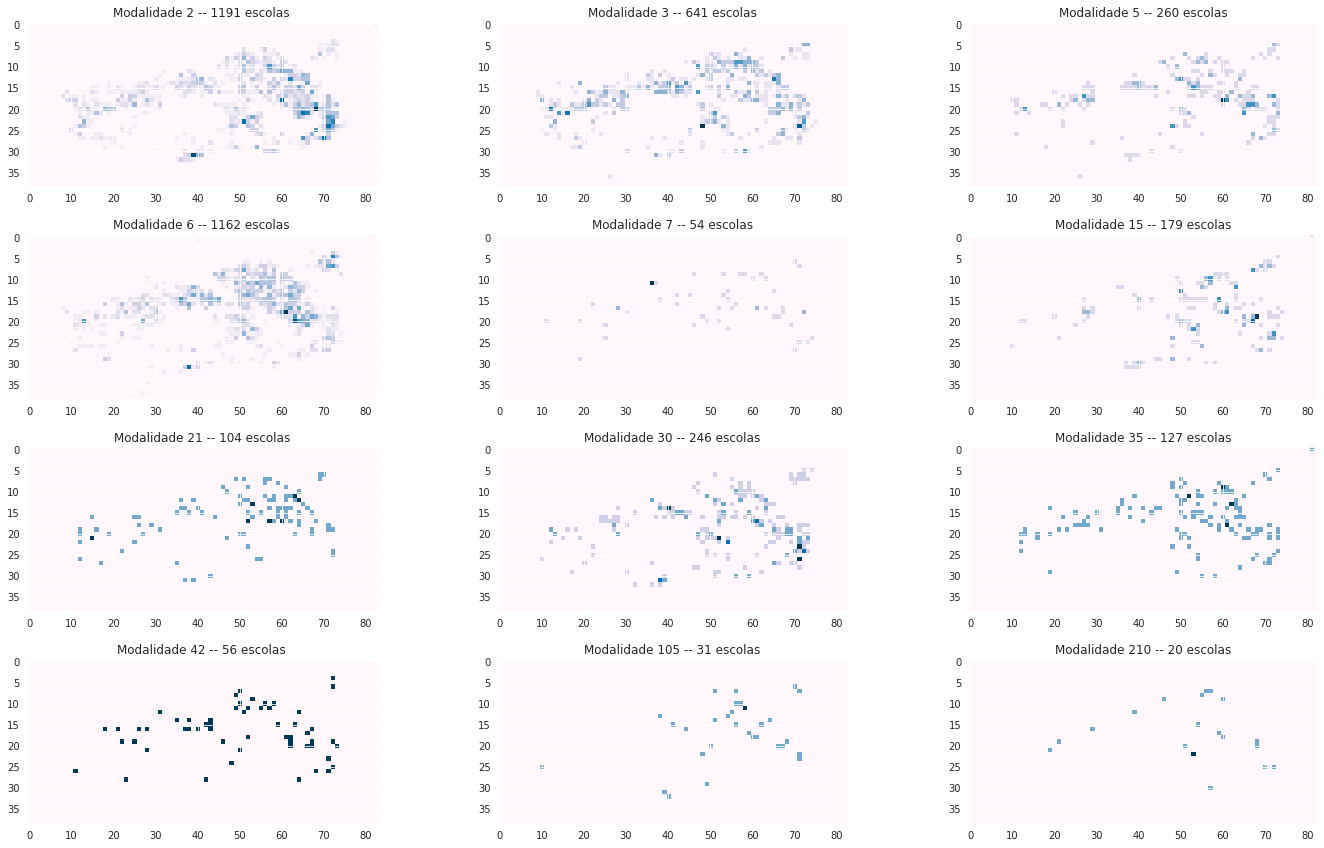

Total de 4071 escolas


In [14]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize = (20,12))

for i,row in enumerate(ax):
    for j,col in enumerate(row):
        col.imshow(escolas[j+3*i], cmap = 'PuBu')
        col.set_title(f'Modalidade {modalidades[j+3*i]} -- {np.sum(escolas[j+3*i])} escolas')
fig.tight_layout(pad=1.5)
plt.show()
print(f'Total de {np.sum(escolas)} escolas')

In [15]:
eixo_x = ['0 a 3 anos', '4 a 5 anos', '6 a 14 anos', '15 a 19 anos', '20 a 100 anos']
eixo_y = np.sum(groups_fraction,axis = 0)*100
eixo_y2 = [f'{np.round(i)}%' for i in eixo_y]

In [16]:
rio.pop_pos

array([[69.58428595, 35.123     ],
       [69.57789303, 35.1270097 ],
       [69.57789303, 35.1189903 ],
       ...,
       [23.10050705,  0.6858    ],
       [23.280008  ,  0.7058    ],
       [24.388115  ,  0.7884    ]])

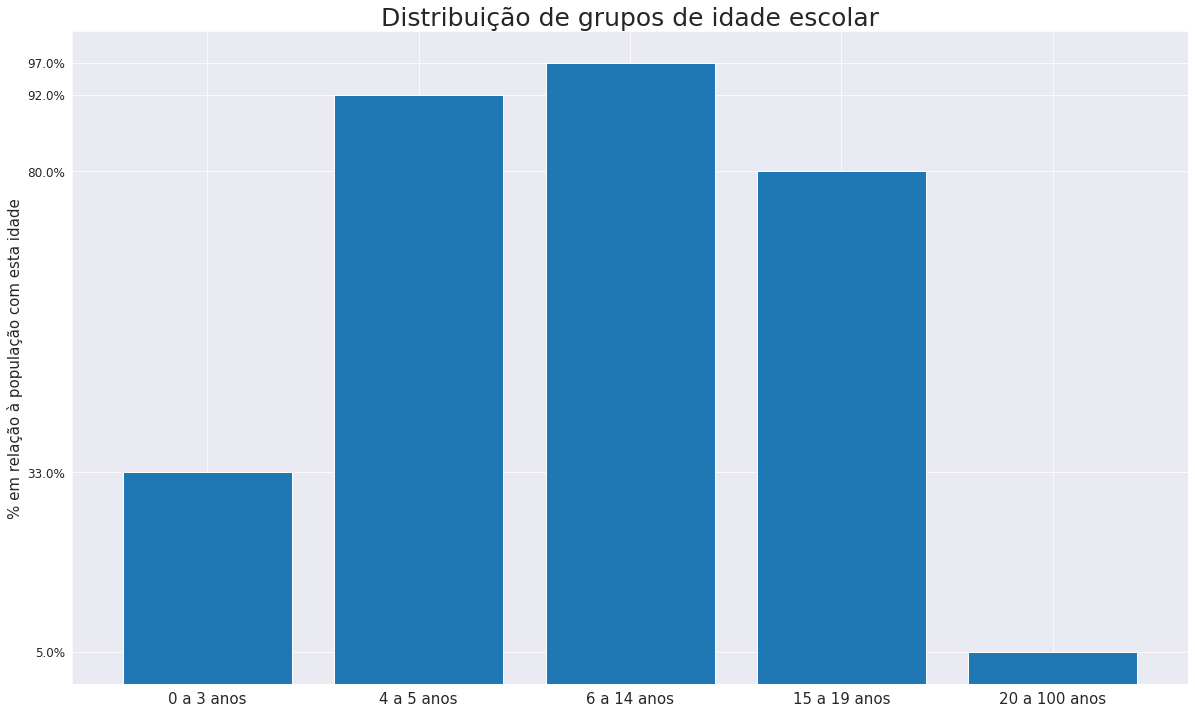

In [17]:
plt.figure(figsize = (20,12))
plt.bar( eixo_x,height = np.sum(groups_fraction,axis = 0)*100)
plt.title('Distribuição de grupos de idade escolar', fontsize = 25)
plt.yticks(eixo_y, labels = eixo_y2, fontsize = 12)
plt.ylabel('% em relação à população com esta idade', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [18]:
dist_tam_escolas = np.sum([[len(i) for i in j] for j in ntw_school.students])

In [19]:
np.max(dist_tam_escolas), np.mean(dist_tam_escolas)

(2115, 427.5444444444444)

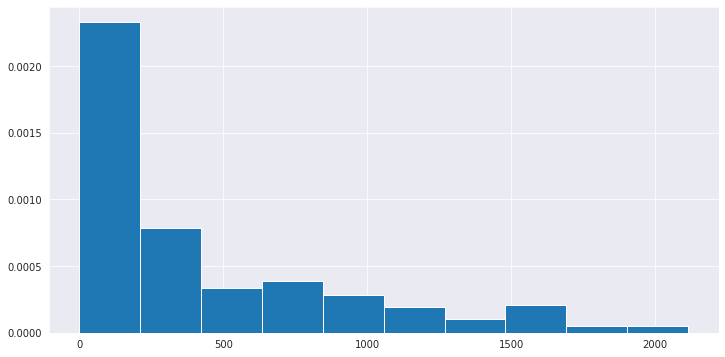

In [24]:
plt.figure(figsize=(12,6))
plt.hist(dist_tam_escolas, density = True)
# plt.hist(dist_tam,bins=150, alpha = .5, density = True)
plt.show()

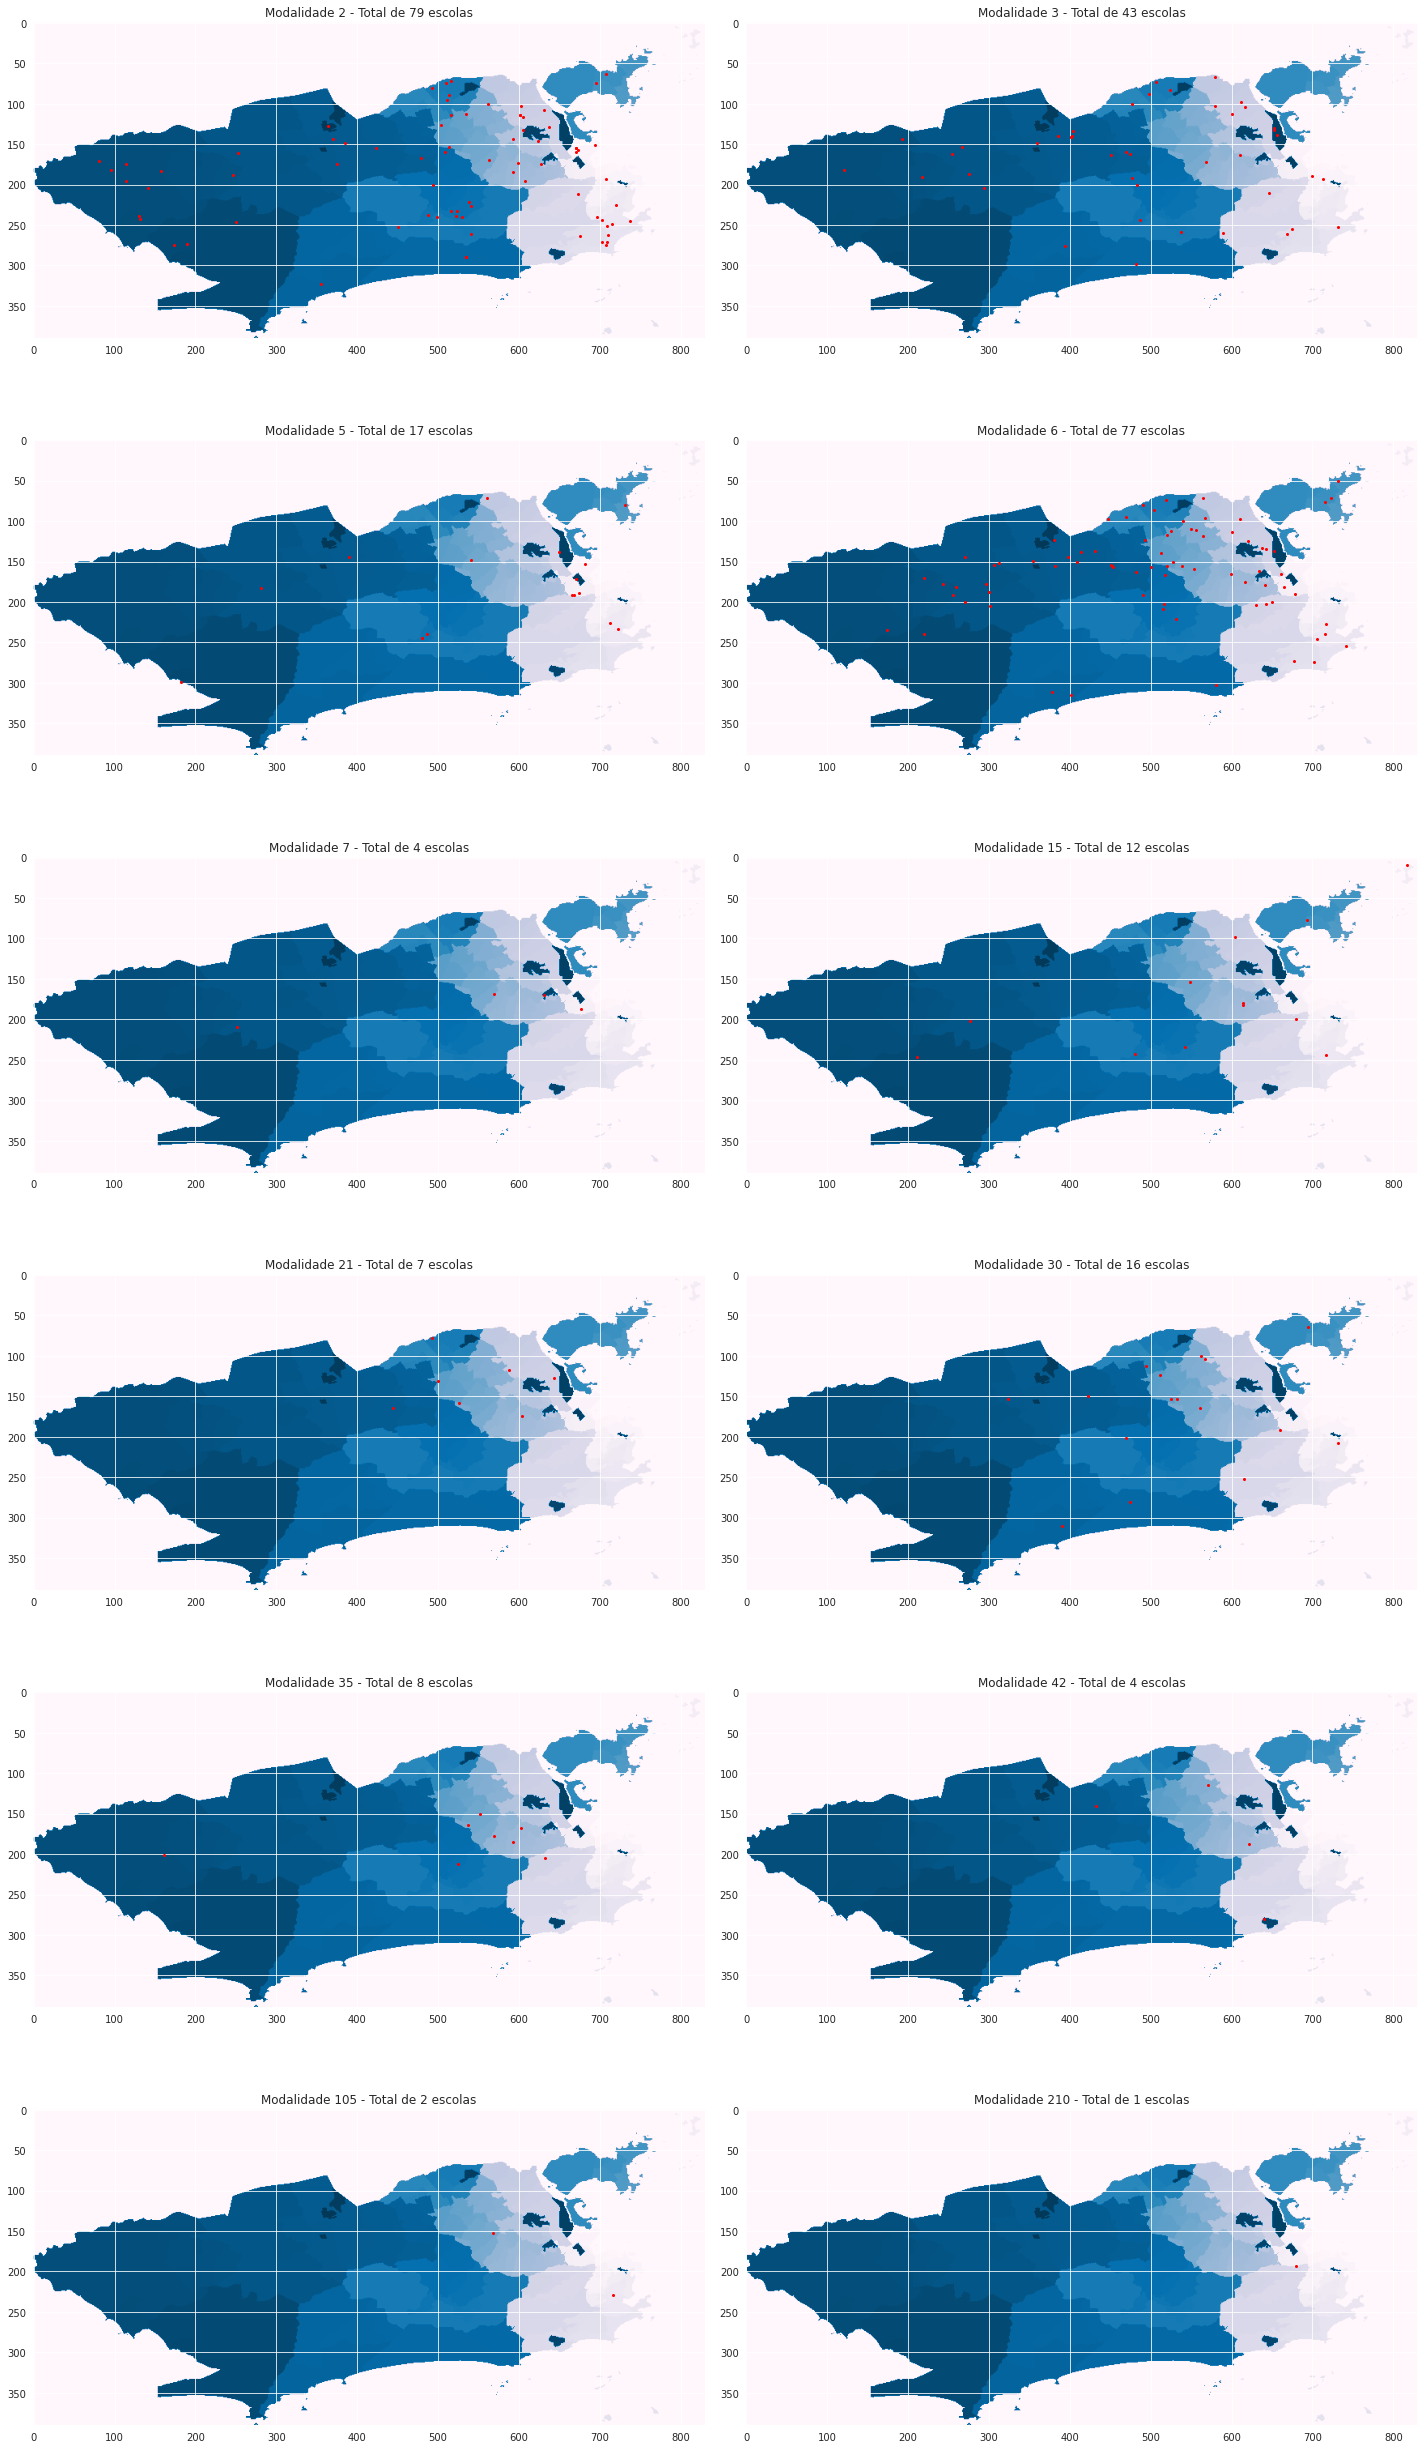

In [25]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize = (20,35))

for i,row in enumerate(ax):
    for j,col in enumerate(row):
        x_a, y_a = np.array(ntw_school.school_position[j+2*i]).T
        col.scatter(x_a,y_a,s = 4, color = 'red')
#         col.imshow(bairros_fino_corrigido, cmap = 'PuBu')
        col.imshow(rio.nbh_matrix, cmap = 'PuBu')
#         col.invert_yaxis()
        col.set_title(f'Modalidade {modalidades[j+2*i]} - Total de {len(ntw_school.school_position[j+2*i])} escolas')
fig.tight_layout(pad=1.5)
plt.show()

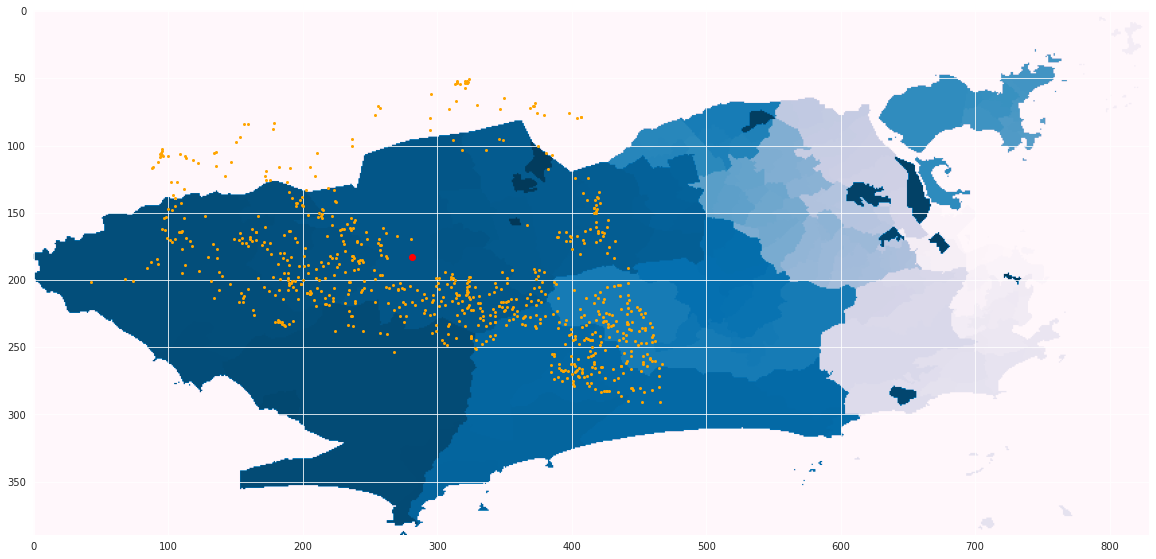

In [26]:
plt.figure(figsize = (20,12))
x,y = (rio.pop_pos[ntw_school.students[2][7]]*[9.9,9.8]).T
esc_x, esc_y = ntw_school.school_position[2][7]
plt.imshow(rio.nbh_matrix, cmap = 'PuBu')
plt.scatter(x,y, s = 4, color = 'orange')
plt.scatter(esc_x, esc_y, color = 'red')
# plt.gca().invert_yaxis()
plt.show()

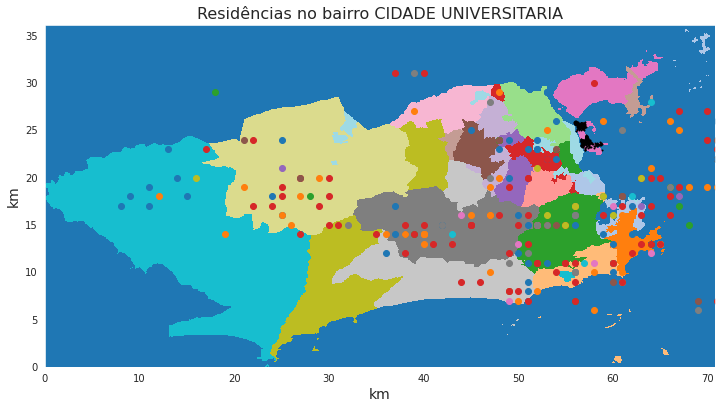

In [51]:
nbh = 105
plt.figure(figsize=(12,8))
rio.show_nbh()
rio.plot_res(nbh=nbh, color='black')
# plt.scatter(rio.pop_pos[:,0], rio.pop_pos[:,1], color = 'red')
for i in range(12):
    plt.scatter((np.array(ntw_school.school_position[i])//10)[:,0], (np.array(ntw_school.school_position[i])//10)[:,1])
plt.title(f'Residências no bairro {rio.nbh_id_to_name[nbh]}', fontsize=16)
plt.xlabel('km', fontsize=14)
plt.ylabel('km', fontsize=14)
plt.show()

array([[70,  6],
       [51,  7],
       [69,  7],
       [51,  7],
       [49,  8],
       [51,  8],
       [51,  9],
       [56, 10],
       [60, 10],
       [63, 10],
       [53, 11],
       [51, 11],
       [60, 11],
       [60, 11],
       [60, 11],
       [50, 12],
       [36, 12],
       [63, 12],
       [60, 13],
       [37, 14],
       [59, 14],
       [62, 14],
       [38, 14],
       [69, 15],
       [51, 15],
       [42, 15],
       [67, 15],
       [67, 15],
       [67, 15],
       [50, 16],
       [67, 16],
       [25, 16],
       [47, 16],
       [56, 17],
       [ 8, 17],
       [59, 17],
       [37, 17],
       [62, 17],
       [11, 17],
       [ 9, 18],
       [15, 18],
       [59, 18],
       [24, 18],
       [70, 19],
       [60, 19],
       [11, 19],
       [49, 20],
       [14, 20],
       [67, 21],
       [53, 22],
       [72, 22],
       [54, 22],
       [51, 23],
       [52, 23],
       [48, 23],
       [13, 23],
       [52, 23],
       [49, 24],
       [52, 24

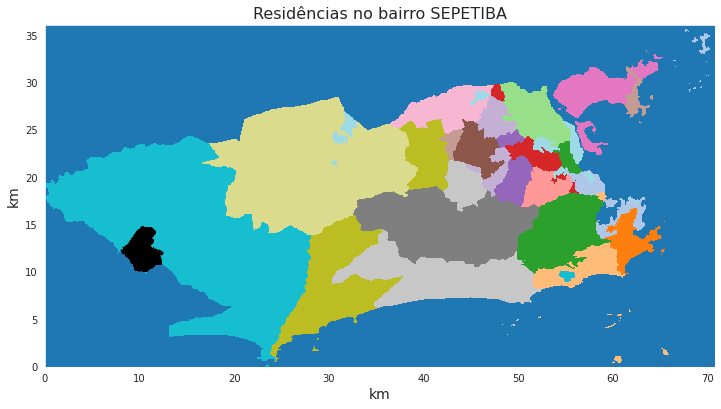

In [23]:
nbh='Sepetiba'
plt.figure(figsize=(12,8))
rio.show_nbh()
rio.plot_res(nbh=nbh, color='black')
plt.title(f'Residências no bairro {nbh.upper()}', fontsize=16)
plt.xlabel('km', fontsize=14)
plt.ylabel('km', fontsize=14)
plt.show()

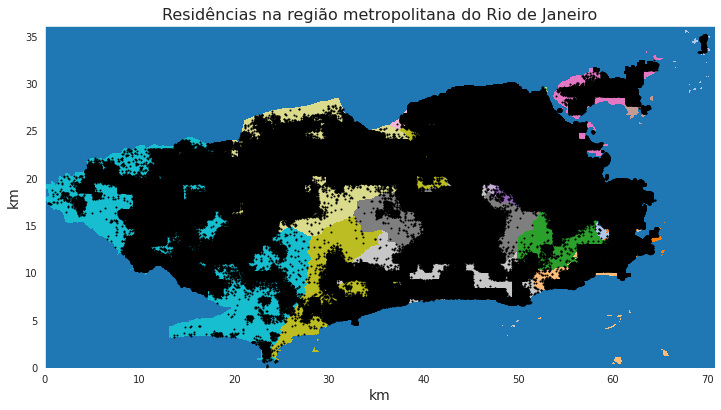

In [24]:
plt.figure(figsize=(12,8))
rio.show_nbh()
rio.plot_res(color='black')
plt.title('Residências na região metropolitana do Rio de Janeiro', fontsize=16)
plt.xlabel('km', fontsize=14)
plt.ylabel('km', fontsize=14)
plt.show()

<!--NAVIGATOR-->

---
[<- Construção dos atributos de idade e infectividade potencial relativa dos indivíduos](01.05-Atributos_de_susceptibilidade_e_infectividade.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 